# Introduction:
The data set I chose is Movie dataset

Here are some notes and comments about this datasets : This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user raings and revenue.

# The questions about this dataset:
1. Does higher budget mean higher popularity? Is there a coefficent relationship ?
   
2. What features are associated with the top 10 revenue-generating movies?

3. How has movie length affected ratings and revenue over time?

4. Which genres are most popular from year to year?


In [1]:
#importing libraries that are will be used.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# DATA WRANGLING

In [2]:
df=pd.read_csv("/content/tmdb-movies.csv")

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.dtypes

,0
id,int64
imdb_id,object
popularity,float64
budget,int64
revenue,int64
original_title,object
cast,object
homepage,object
director,object
tagline,object


In [6]:
df.nunique()

,0
id,10865
imdb_id,10855
popularity,10814
budget,557
revenue,4702
original_title,10571
cast,10719
homepage,2896
director,5067
tagline,7997


In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.info

<bound method DataFrame.info of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      

In [9]:
df.isnull().sum

<bound method DataFrame.sum of           id  imdb_id  popularity  budget  revenue  original_title   cast  \
0      False    False       False   False    False           False  False   
1      False    False       False   False    False           False  False   
2      False    False       False   False    False           False  False   
3      False    False       False   False    False           False  False   
4      False    False       False   False    False           False  False   
...      ...      ...         ...     ...      ...             ...    ...   
10861  False    False       False   False    False           False  False   
10862  False    False       False   False    False           False  False   
10863  False    False       False   False    False           False  False   
10864  False    False       False   False    False           False  False   
10865  False    False       False   False    False           False  False   

       homepage  director  tagline  ...  overview  runtime  genres  \
0         False     False    False  ...     False    False   False   
1         False     False    False  ...     False    False   False   
2         False     False    False  ...     False    False   False   
3         False     False    False  ...     False    False   False   
4         False     False    False  ...     False    False   False   
...         ...       ...      ...  ...       ...      ...     ...   
10861      True     False     True  ...     False    False   False   
10862      True     False    False  ...     False    False   False   
10863      True     False     True  ...     False    False   False   
10864      True     False    False  ...     False    False   False   
10865      True     False    False  ...     False    False   False   

       production_companies  release_date  vote_count  vote_average  \
0                     False         False       False         False   
1                     False         False       False         False   
2                     False         False       False         False   
3                     False         False       False         False   
4                     False         False       False         False   
...                     ...           ...         ...           ...   
10861                 False         False       False         False   
10862                 False         False       False         False   
10863                 False         False       False         False   
10864                 False         False       False         False   
10865                 False         False       False         False   

       release_year  budget_adj  revenue_adj  
0             False       False        False  
1             False       False        False  
2             False       False        False  
3             False       False        False  
4             False       False        False  
...             ...         ...          ...  
10861         False       False        False  
10862         False       False        False  
10863         False       False        False  
10864         False       False        False  
10865         False       False        False  

[10866 rows x 21 columns]>

In [10]:
df.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)

In [11]:
df['cast'] = df['cast'].fillna('missing')
df['director'] = df['director'].fillna('missing')
df['tagline'] = df['tagline'].fillna('missing')
df['keywords'] = df['keywords'].fillna('missing')
df['genres'] = df['genres'].fillna('missing')
df['production_companies'] = df['production_companies'].fillna('missing')
df['budget'] = df['budget'].replace(0, np.nan)

In [12]:
df.isnull().sum()

,0
popularity,0
budget,5696
revenue,0
original_title,0
cast,0
director,0
tagline,0
keywords,0
runtime,0
genres,0


In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

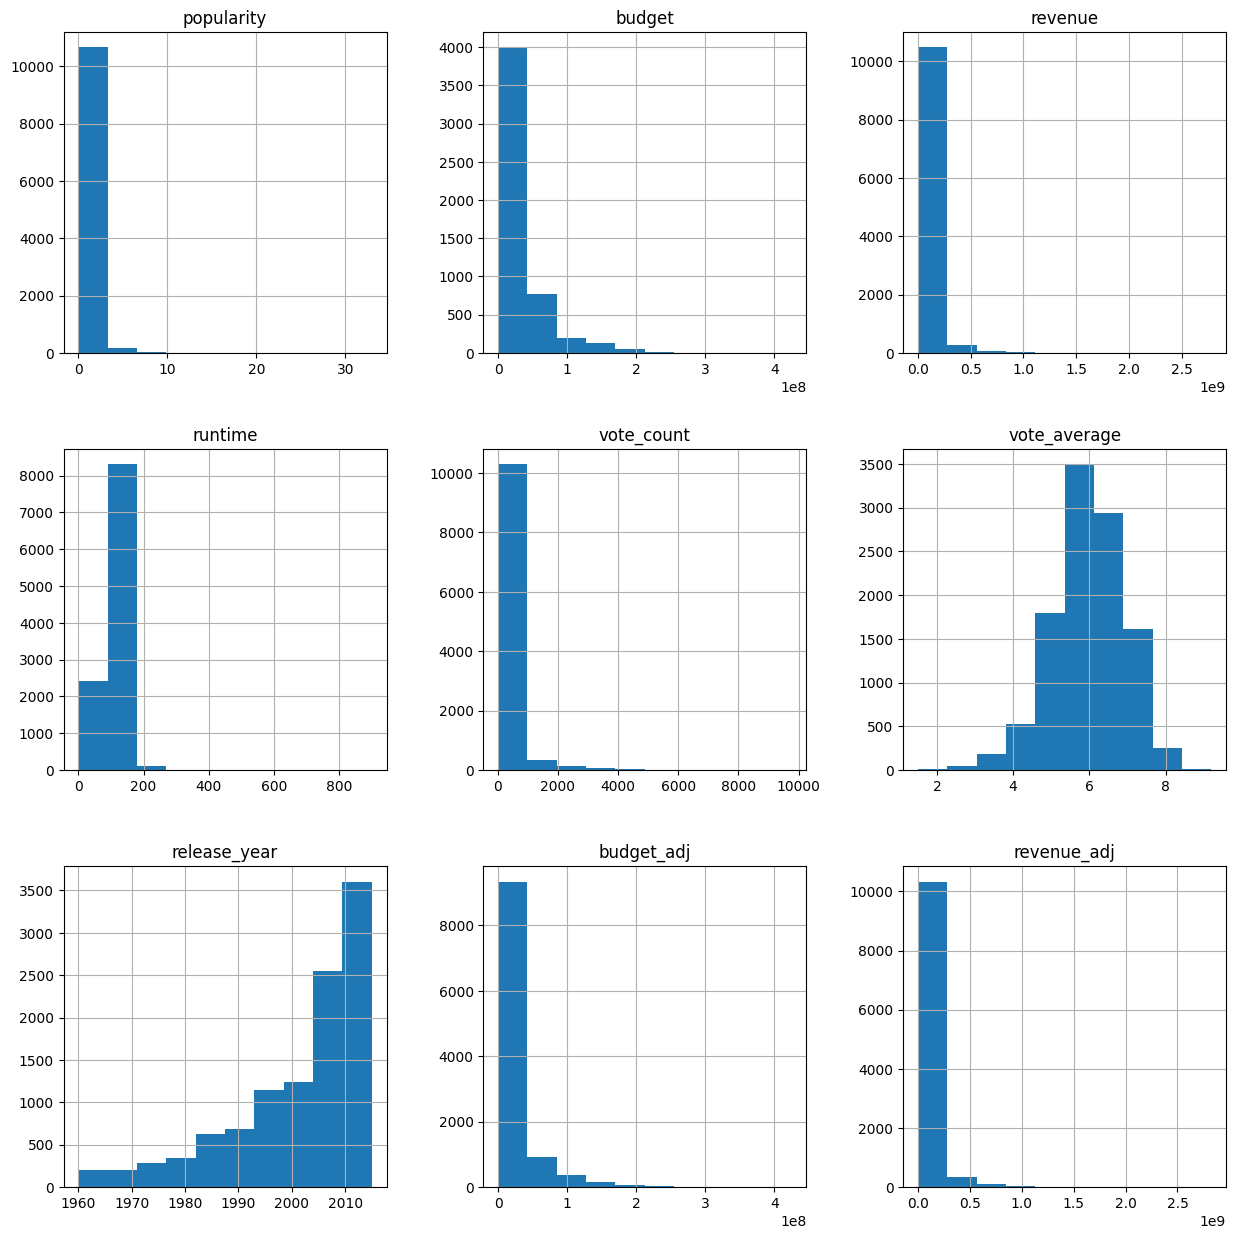

In [16]:
df.hist(figsize=(15,15));

# Exploration

Q1. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

Text(0, 0.5, 'popularity')

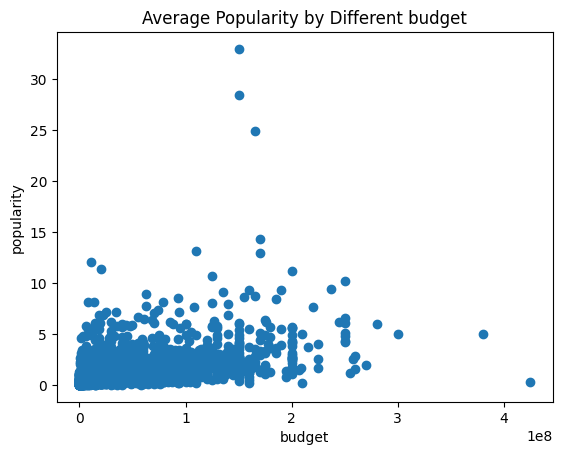

In [17]:
x = df['budget']
y = df['popularity']
plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('budget')
plt.ylabel('popularity')

We can not see very strong relatioship between the budget and the popularity from above plot.

In [18]:
med = df['budget'].median()
low_budg =  df.query('budget < {}'.format(med))
high_budg =  df.query('budget >= {}'.format(med))

In [19]:
mean_low_budget = low_budg['popularity'].mean()
mean_high_budget = high_budg['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

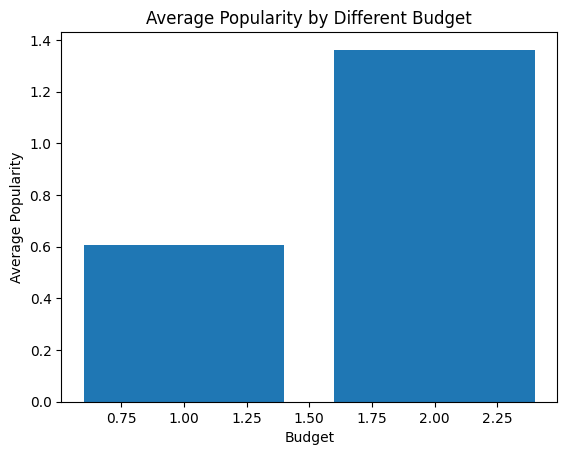

In [20]:
location=[1,2]
temp=[mean_low_budget,mean_high_budget]
plt.bar(location,temp)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budget')
plt.ylabel('Average Popularity')

Through this bar plot, we can clearly see that high budget movies are more likely to have higher popularity.

Q2.What features are associated with the top 10 revenue-generating movies?

In [21]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
top_rev=df.sort_values(by='revenue',ascending=False).head(10)
print(top_rev)

      popularity       budget     revenue  \
1386    9.432768  237000000.0  2781505847   
3      11.173104  200000000.0  2068178225   
5231    4.355219  200000000.0  1845034188   
4361    7.637767  220000000.0  1519557910   
0      32.985763  150000000.0  1513528810   
4       9.335014  190000000.0  1506249360   
14      5.944927  280000000.0  1405035767   
3374    5.711315  125000000.0  1327817822   
5422    6.112766  150000000.0  1274219009   
5425    4.946136  200000000.0  1215439994   

                                    original_title  \
1386                                        Avatar   
3                     Star Wars: The Force Awakens   
5231                                       Titanic   
4361                                  The Avengers   
0                                   Jurassic World   
4                                        Furious 7   
14                         Avengers: Age of Ultron   
3374  Harry Potter and the Deathly Hallows: Part 2   
5422              

Q3. How has movie length affected ratings and revenue over time?

In [22]:
df[['revenue','runtime','release_year']] = df[['revenue','runtime','release_year']].apply(pd.to_numeric, errors='coerce')


In [23]:
yearly_data = df.groupby('release_year')[['runtime', 'revenue']].mean()

In [40]:
yearly_data

,runtime,revenue
release_year,,
1960,110.656250,4.531406e+06
1961,119.419355,1.089420e+07
1962,124.343750,6.736870e+06
1963,111.323529,5.511911e+06
1964,109.214286,8.118614e+06
1965,118.171429,1.308805e+07
1966,106.891304,1.842102e+06
1967,104.950000,1.844587e+07
1968,107.282051,6.788025e+06


In [38]:
yearly_data.index

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype='int64', name='release_year')

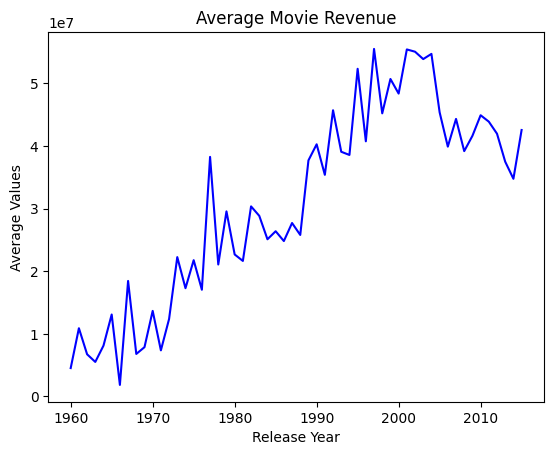

In [44]:
plt.plot(yearly_data.index, yearly_data['revenue'],label='runtime', color='blue')
plt.xlabel('Release Year')
plt.ylabel('Average Values')
plt.title('Average Movie Revenue')
plt.show()

Text(0.5, 1.0, 'Average Movie Runtime')

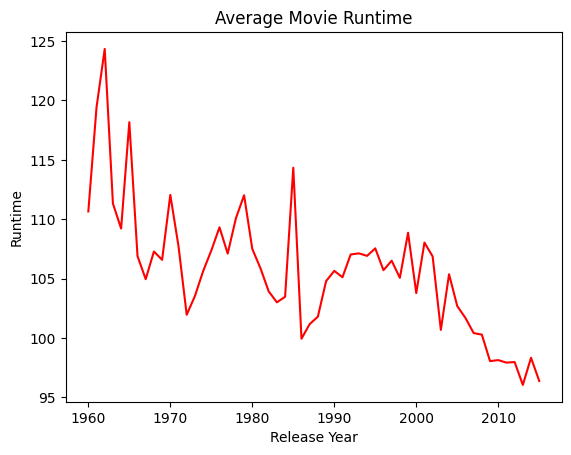

In [45]:
plt.plot(yearly_data.index, yearly_data['runtime'], color='red',label='revenue')
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Average Movie Runtime')

Q4. Which genres are most popular from year to year?

In [26]:
df[['popularity','release_year']]=df[['popularity','release_year']].apply(pd.to_numeric,errors='coerce')

In [27]:
df['genres']=df['genres'].str.split('|')
df=df.explode('genres')

In [28]:
genre_popularity_by_year = df.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()
popular_genres = genre_popularity_by_year.loc[genre_popularity_by_year.groupby('release_year')['popularity'].idxmax()]

In [29]:
print(popular_genres[['release_year', 'genres', 'popularity']])

      release_year           genres  popularity
13            1960         Thriller    0.811910
18            1961        Animation    2.631987
34            1962        Adventure    0.942513
52            1963        Animation    2.180410
83            1964              War    0.930959
95            1965            Music    0.968850
105           1966        Animation    0.585717
123           1967        Animation    1.348805
149           1968          Mystery    1.519456
159           1969            Crime    0.948020
175           1970        Animation    1.127719
200           1971           Family    1.530722
216           1972            Crime    1.072768
230           1973        Animation    0.956526
258           1974          Mystery    0.702035
267           1975        Adventure    0.880297
287           1976            Crime    0.707249
303           1977           Action    1.419319
333           1978            Music    0.679805
341           1979           Action    1

# CONCLUSION:
Based on the analysis I did above, we can make the following summarizations:
1. We can not say high budget guarantees high popularity. But for movies with higher budgets do produce higher average popularity.
2. It has been observed that over the years movies are making more revenue and runtime of movies has decreased. So if a person is to make a new movie now runtime of it should be less.
3. If a person makes an adventure or western genre there are chances for it be more popular according to recent time trends on basis of popularity.

# Limitations:
1. There are some missing data and many erroreous zeros which may affect the analysis.
2. It's hard for us to know how the vote_counts and popularity are measured.